# Pandas

Pandas is a Python package for the IO, analysis and handling of tables. If you are used to using Excel and want to use Python for analysis, Pandas is your friend. You can import it by just typing `import pandas`. It is so often used, it has even acquired a common alias in the Python community: `pd`. You can rename a package upon importing like so:

In [75]:
import pandas as pd  # import pandas, and rename the package to "pd"

## Basic pandas functionality

In this section, you will learn basic functionality of pandas.

We will start by creating a simple DataFrame from scratch. pandas uses the concept of `DataFrame` instead of a "table" or "spreadsheet", as a DataFrame can be more general. However, it's ok to just think of it as a Python version of a spreadsheet.

In [ ]:
# create a sample table
my_table = pd.DataFrame({
    "A": [1, 2, 3, 4, 5],
    "B": ['a', 'b', 'c', 'd', 'e'],
    "C": [4.0, 5.0, 6.0, 7.0, 4.0],
    },
)

In [164]:
my_table

,A,B,C
0,1,a,4.0
1,2,b,5.0
2,3,c,6.0
3,4,d,7.0
4,5,e,4.0


In [ ]:
my_table.shape  # the size of the DataFrame. useful when they get larger.

(5, 3)

Oftentimes, tables/dataframes are very big, and simply printing them out would take up most of your screen. You can quickly peek into a large dataframe using either `head()` or `tail()`:

In [166]:
my_table.head(n=2)  # show the first n rows

,A,B,C
0,1,a,4.0
1,2,b,5.0


In [167]:
my_table.tail(n=2)  # show the last n rows

,A,B,C
3,4,d,7.0
4,5,e,4.0


It is often useful to get some quick statistics of a table you have. `pandas` has a neat built-in method called `describe()`

In [168]:
my_table.describe()

,A,C
count,5.000000,5.00000
mean,3.000000,5.20000
std,1.581139,1.30384
min,1.000000,4.00000
25%,2.000000,4.00000
50%,3.000000,5.00000
75%,4.000000,6.00000
max,5.000000,7.00000


> *Question*: Why is column 'B' absent here?

### Accessing data in the DataFrame

There are many ways to access and set data in a pandas DataFrame. We will cover the default `pandas`-like way, but you may find other ways that seem more intuitive for you, or encounter different methods on the wild west of the world wide web.

To select a single column from the Dataframe, simply use the index method of square brackets `[ ]`

In [169]:
my_table['B']

0    a
1    b
2    c
3    d
4    e
Name: B, dtype: object

If you want to select a *row* instead of a column, you need to use the `.iloc` method, and then use the square brackets:

In [170]:
my_table.iloc[0]

A    1
B    a
C    4
Name: 0, dtype: object

To access multiple columns at the same time, you can pass a list of the columns you want inside of the square brackets. This will result in double square brackets: `[[ ]]`

In [171]:
my_table[['A', 'B']]

,A,B
0,1,a
1,2,b
2,3,c
3,4,d
4,5,e


A tuple of column names works equally well though, if that's what you prefer.

If you remember indexing and slicing in numpy (see the lectures of the preivous day), then you might be happy to know that these also work for `pandas`! yay!

In [172]:
my_table.iloc[:, 0:2]

,A,B
0,1,a
1,2,b
2,3,c
3,4,d
4,5,e


In [173]:
my_table.iloc[1:3, :]

,A,B,C
1,2,b,5.0
2,3,c,6.0


### Querying data

`pandas` is made to mimic SQL syntax; a popular data handling software. it allows you to quickly fetch data from big datasets based on indexing, but also conditions. For example, say we want all data that is larger than some value in a column:

In [ ]:
# Read this as: 
my_table[              # select from my_table the following positions:
    my_table['A'] > 2  # all locations where the value in column A is greater than 2
]

,A,B,C
2,3,c,6.0
3,4,d,7.0
4,5,e,4.0


In [ ]:
my_table[              # select from my_table the following positions:
    my_table['B'].isin(['a', 'b'])  # all locations where the value in column B appears in the following list: ['a', 'b']
]

,A,B,C
0,1,a,4.0
1,2,b,5.0


You can use this so-called boolean mask as an index, leading to relatively readable syntax:

In [179]:
my_table[my_table['C'].between(3.5, 4.5)]

,A,B,C
0,1,a,4.0
4,5,e,4.0


## Simulation data

The previous example used a rather simple datasets. Let's apply our freshly gained knowledge on something cooler. Below, you will learn how to read in and analyze a large `DataFrame` with simulation data. What this `DatFrame` actually contains should become more and more clear as the exercise progresses.

In [182]:
simulation_data = pd.read_csv('./data/simulation_data.csv', header=0, index_col=0)

In [183]:
simulation_data.head()

,recording_location,0.0,0.125,0.25,0.375,0.5,0.625,0.75,0.875,1.0,...,5998.75,5998.875,5999.0,5999.125,5999.25,5999.375,5999.5,5999.625,5999.75,5999.875
sim_ID,,,,,,,,,,,,,,,,,,,,,
0,soma,-76.0,-76.06,-76.1,-76.1,-76.2,-76.25,-76.25,-76.3,-76.4,...,-73.94,-73.94,-74.0,-74.0,-74.06,-74.06,-74.06,-74.06,-74.06,-74.10
1,soma,-76.0,-76.06,-76.1,-76.1,-76.2,-76.25,-76.25,-76.3,-76.4,...,-67.70,-67.70,-67.7,-67.7,-67.70,-67.70,-67.75,-67.75,-67.75,-67.80
2,soma,-76.0,-76.06,-76.1,-76.1,-76.2,-76.25,-76.25,-76.3,-76.4,...,-74.00,-74.00,-74.0,-74.0,-74.00,-74.00,-74.00,-74.00,-74.00,-74.00
3,soma,-76.0,-76.06,-76.1,-76.1,-76.2,-76.25,-76.25,-76.3,-76.4,...,-72.00,-72.00,-72.0,-72.0,-72.06,-72.06,-72.06,-72.06,-72.06,-72.06
4,soma,-76.0,-76.06,-76.1,-76.1,-76.2,-76.25,-76.25,-76.3,-76.4,...,-70.56,-70.56,-70.5,-70.5,-70.50,-70.50,-70.44,-70.44,-70.44,-70.44


In [235]:
simulation_data.shape

(256, 48001)

that's a lot of columns... If we were to use `.describe()` right now, it would calculate statistics for each of 48 thousand columns. That might take some time. It would be wise to calculate some statistics of just a subset of this data to get a feeling. Let's use slicing to describe only the first handful of columns. This omits a lot of data, but at least we get a feeling of what we're working with.

In [240]:
simulation_data.iloc[:, :5].describe()

,0.0,0.125,0.25,0.375
count,256.0,256.000000,256.000000,256.000000
mean,-76.0,-76.000000,-76.020000,-76.000000
std,0.0,0.060118,0.080157,0.100196
min,-76.0,-76.060000,-76.100000,-76.100000
25%,-76.0,-76.060000,-76.100000,-76.100000
50%,-76.0,-76.000000,-76.020000,-76.000000
75%,-76.0,-75.940000,-75.940000,-75.900000
max,-76.0,-75.940000,-75.940000,-75.900000


Hmmmmm, all of these values look kind of similar. The mean of column `0` is $-76$, and so are the quartiles, min and max. Why could that be? 

> **Question**: What does this value represent?

Instead of calculating statistics column per column, let's try to go row by row. We can transpose `DataFrames` by adding a `.T`. We can also ignore the `recording_location` column for this in the meantime by adding `.drop()`.

> **Note**: `drop` does not delete the data in this column. It simply ignores it for this piece of code. If you want to remove data from a column, you would need to:
> - drop the column
> - also re-assign the result to a new variable
> - also write the result to a new file

In [241]:
simulation_data.drop("recording_location", axis=1).T.describe()

sim_ID,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
count,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,...,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000
mean,-66.999091,-66.973913,-66.362428,-67.792368,-67.989891,-66.501690,-67.537639,-66.471042,-67.684128,-67.494728,...,-67.058974,-67.304306,-67.982774,-67.794344,-66.127437,-67.715408,-68.386875,-67.779383,-67.430587,-65.878156
std,5.192699,1.765080,3.693267,1.766801,4.302696,7.507614,1.857090,4.570470,2.645252,6.597821,...,1.990509,2.942608,1.501385,1.996356,6.598068,1.792478,1.620164,2.701181,2.122023,2.844914
min,-76.750000,-76.700000,-76.500000,-76.600000,-76.500000,-79.100000,-76.600000,-76.600000,-76.800000,-77.060000,...,-76.000000,-76.000000,-76.000000,-76.000000,-76.000000,-76.000000,-76.000000,-76.000000,-76.000000,-76.000000
25%,-69.700000,-67.900000,-68.500000,-68.750000,-70.440000,-71.200000,-68.700000,-69.060000,-69.250000,-71.250000,...,-68.400000,-69.400000,-68.940000,-69.100000,-69.700000,-68.940000,-69.440000,-69.750000,-68.900000,-67.700000
50%,-67.750000,-66.900000,-66.560000,-67.700000,-68.750000,-66.440000,-67.440000,-66.600000,-67.700000,-68.100000,...,-67.200000,-67.600000,-68.000000,-67.940000,-67.300000,-67.850000,-68.300000,-68.200000,-67.600000,-65.900000
75%,-65.400000,-65.800000,-63.900000,-66.700000,-66.060000,-62.600000,-66.300000,-64.485000,-66.100000,-64.200000,...,-65.750000,-65.560000,-66.940000,-66.600000,-64.300000,-66.560000,-67.250000,-66.100000,-66.200000,-64.100000
max,33.530000,-62.060000,30.780000,-62.840000,33.250000,33.560000,-62.780000,32.400000,31.730000,32.500000,...,-59.200000,-54.000000,-62.720000,-60.900000,-3.020000,-60.000000,-63.880000,-55.530000,-59.780000,-49.840000


That still just looks like a bunch of numbers (but maybe you already know what they represent)

Let's visualize them to get an even better sense of what they are. Both `matplotlib` and `seaborn` are powerful plotting libraries in Python.

`matplotlib` is so-called "low-level": it gives you a lot of control over each component of a graph: the size and position of the graph title, whether or not to show gridlines, the thickness of every single line if you want to. This level of control often means you *have* to take control over each little component of a graph. 

`seaborn` is a so called "high-level" library. It makes use of `matplotlib` to provide you with a near-finished graph. It makes a bunch of choices for you, so you don't have to. That also means that once you want to take over control, it's a bit difficult.

For a quick and nice graph, we will use `seaborn`.

<AxesSubplot:ylabel='sim_ID'>

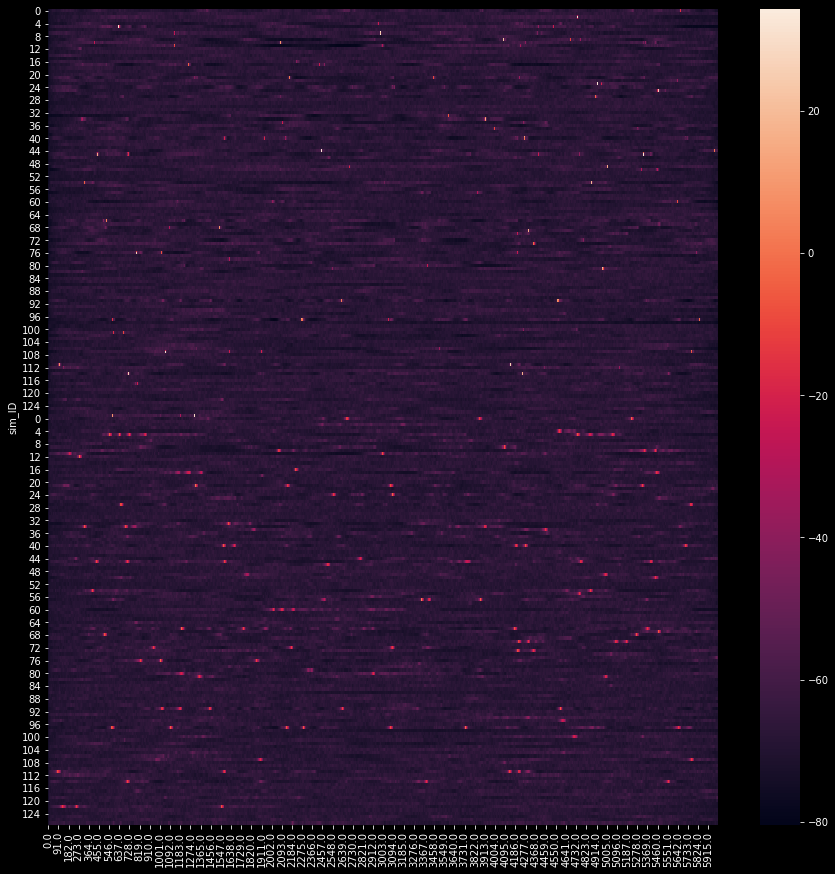

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("dark_background")  # Set the backrgound to black, simply because it looks cool
fig = plt.figure(figsize=(15, 15))

sns.heatmap(
    simulation_data.drop(
        ['recording_location'], 
        axis=1)
    )

> **Question**: What do you think this data is?
>
>**Question 2**: What could the x-axis be? What is the colorscale?

In [233]:
simulation_data['recording_location'].unique()

array(['soma', 'nexus'], dtype=object)

In [191]:
soma = simulation_data[simulation_data['recording_location'] == 'soma'].drop('recording_location', axis=1)
nexus = simulation_data[simulation_data['recording_location'] == 'nexus'].drop('recording_location', axis=1)

> **Exercise**: plot out the first couple of samples, for all timepoints

> **Exercise**: plot out the first 3200 timepoints, for the first 20 samples

> **Exercise**: play around with the plots below to make a nice figure. You can change the colormap, background, linewidths, amount of samples/timepoints etc.

> **Hint**: You can save figures with `plt.savefig("path_to_figure.png", dpi=300)`


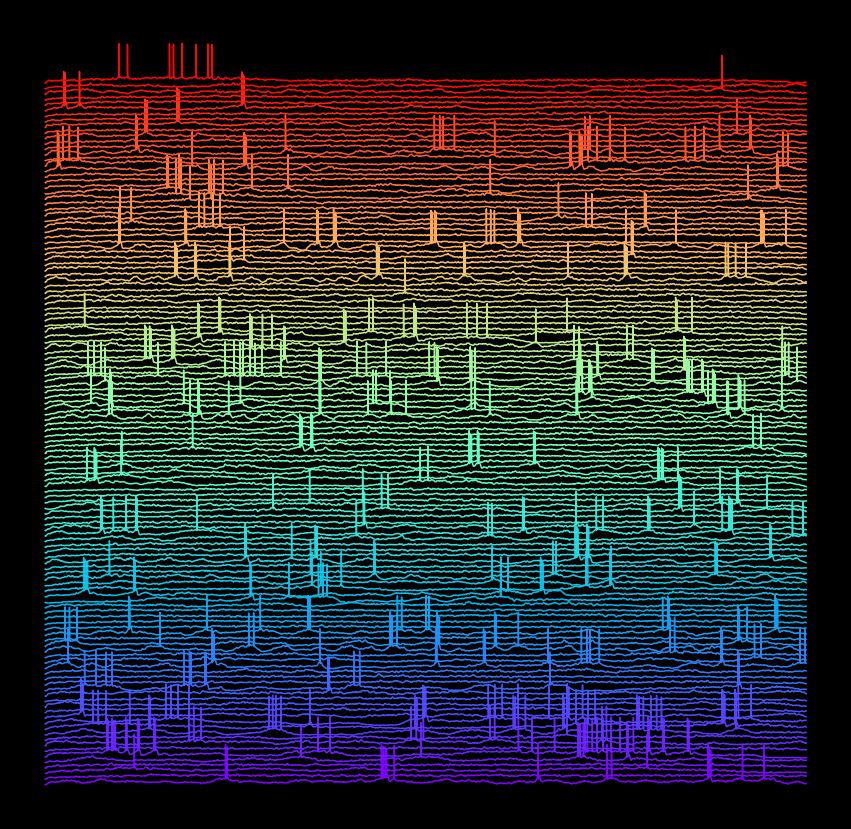

In [ ]:
from matplotlib.cm import rainbow  # import a colormap that maps a number to a color
plt.style.use('dark_background')
N = 200
fig = plt.figure(figsize=(15, 15))
plt.axis('off')

for i, row in soma.head(N).iterrows():
    plt.plot(
        row.index.values.astype(float),     # The indices are strings, so we need to convert them to floats
        row.values + i*15,                  # plot out the value, plus some offset
        zorder=i,                           # Setting the correct depth of each trace
        c = rainbow(i/len(soma))            # map the index of the trace to a color
    )

> **Trivia**: the plot above is called a ridgeline plot. It is alse colloquially callled a joyplot, named after the band Joy Division, which have a similar plot on the cover of their album "Unkown Pleasures". The Joy Division album is showing measurements of radiowaves emitted by a rotating neutron star PSR B1919+21 some thousand lightyears away. When radio-astronomers measured these signals for the first time, they did not know yet that pulsars existed, and they thought we were being contacted by aliens. For this reason,  PSR B1919+21 got the nickname LGM ("Little Green Men").

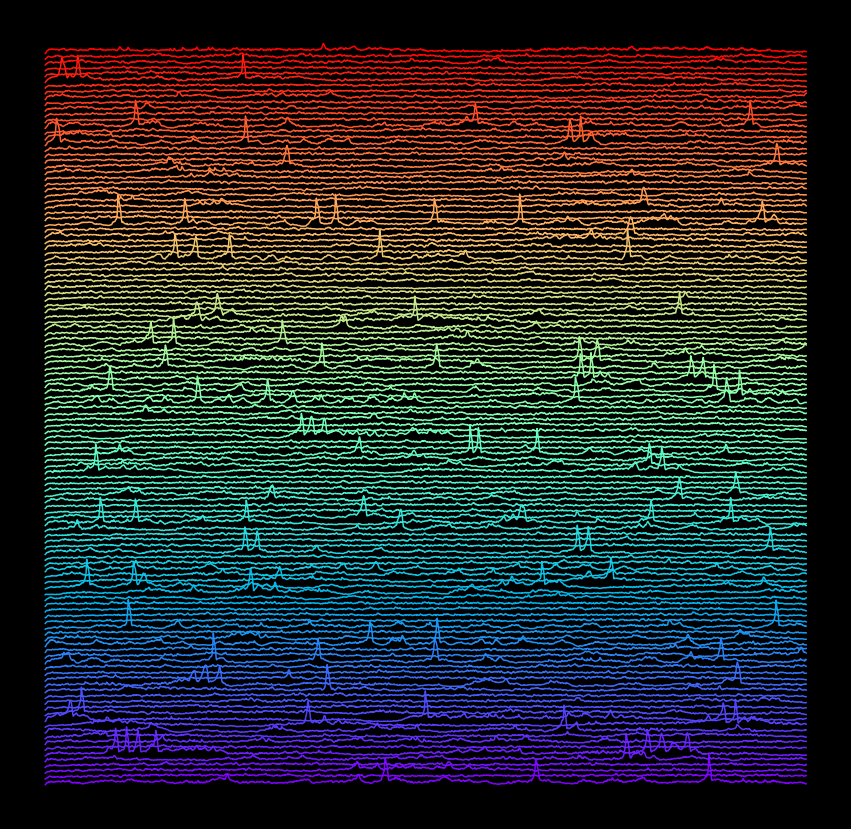

In [232]:
from matplotlib.cm import rainbow  # import a colormap that allows to map a number to a color
plt.style.use('dark_background')
N = 200
fig = plt.figure(figsize=(15, 15))
plt.axis('off')

for i, row in nexus.head(N).iterrows():
    plt.plot(
        row.index.values.astype(float),
        row.values + i*15,
        zorder=i,
        c = rainbow(i/len(nexus))
    )